<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_11_Evaluation_Metrics_For_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Evaluation Metrics


## 1.Classification Accuracy:
The simplest metric for model evaluation is Accuracy. It is the ratio of the number of correct predictions to the total number of predictions made for a dataset.

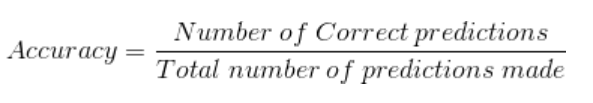

Accuracy is useful when the target class is well balanced but is not a good choice with unbalanced classes.

For example, A dataset with two target classes containing 100 samples. 98 samples belong to class A and 2 samples belong to class B in our training data, our model would give us 98% accuracy. That’s why we need to look at more metrics to get a better result.

Here, we have python implementation of Accuracy:

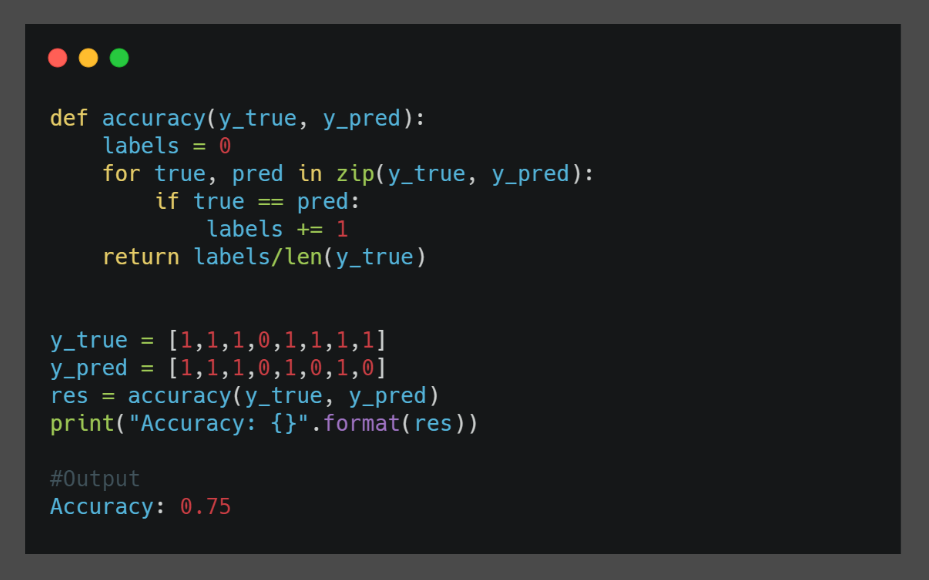

Accuracy gives us an overall picture of how much we can rely on our model’s prediction. This metric is blind to the difference between classes and types of errors. That’s why it is not good enough for imbalanced datasets.

## 2.Logarithmic Loss or Log Loss:
Log Loss can be used when the output of the classifier is a numeric probability instead of a class label. Log loss measures the unpredictability of the extra noise that comes from using a predictor as opposed to the true labels.

Log loss for a binary classifier:

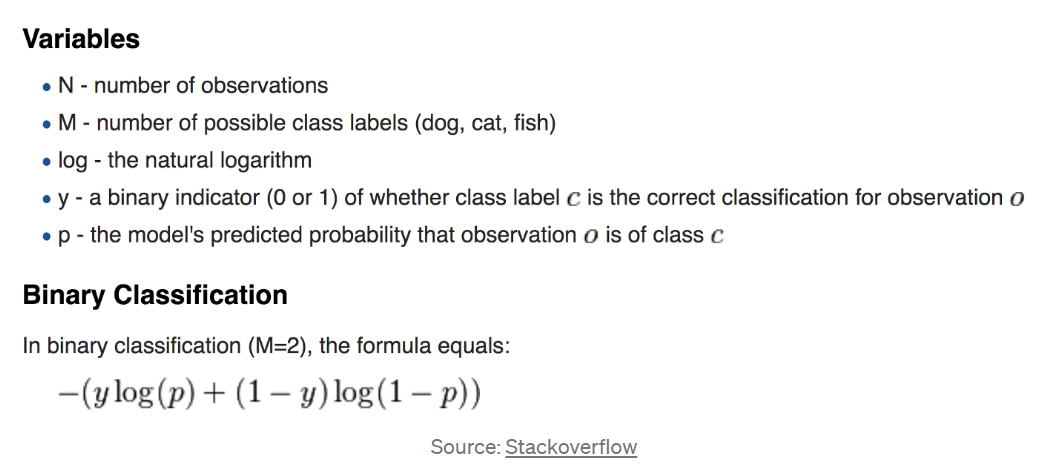

Log loss for multi-class classification:

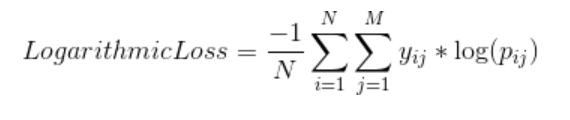

Consider, N samples belong to the M class. where,

y_ij indicates whether sample i belongs to class j or not

p_ij indicates the probability of sample i belonging to class j

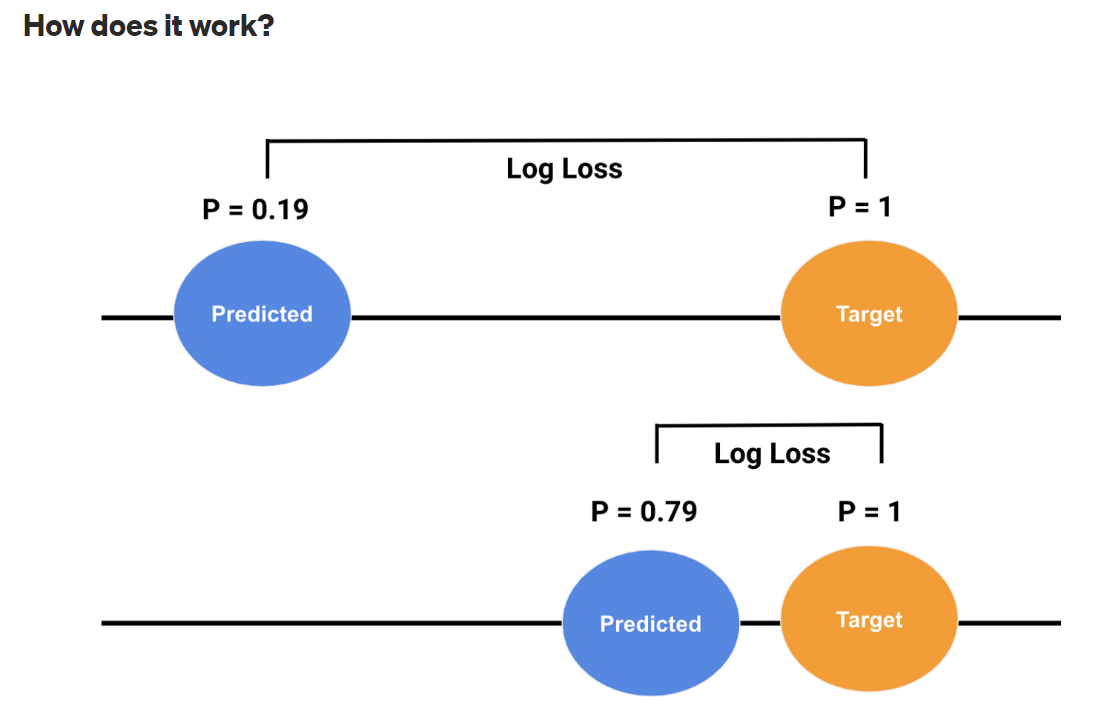

The above image is of actual(Target) and Predicted probabilities.

* The top image depicts a poor prediction because of the large difference between the actual and predicted probability which gives us a large log loss. Here, the function penalizes the wrong answer that the model is confident about.
* The bottom image depicts a good prediction because the predicted probability is close to the actual probability which gives us a small log loss. Here, the function is rewarding a correct answer that the model is confident about.


Log loss doesn’t have an upper bound and it exists on the range [0, ∞). Minimizing log loss gives greater accuracy for the classifier.

Here, we have a scikit-learn implementation of Log Loss:

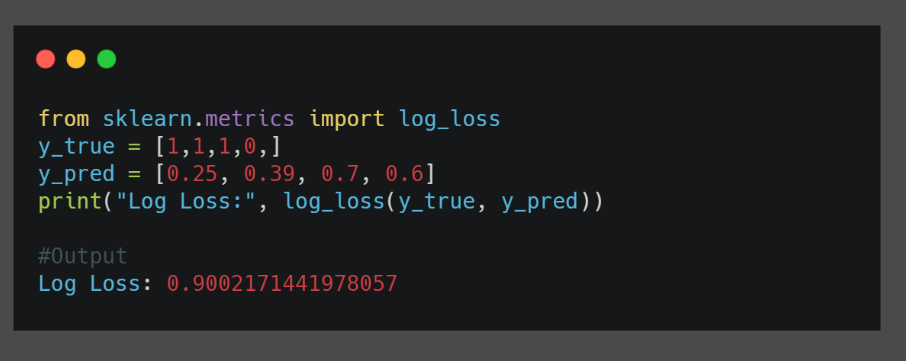

## 3.Confusion Matrix:
A confusion matrix or error matrix is a table that shows the number of correct and incorrect predictions made by the model compared with the actual classifications in the test set or what type of errors are being made.

This matrix describes the performance of a classification model on test data for which true values are known. It is a n*n matrix, where n is the number of classes. This matrix can be generated after making predictions on the test data.

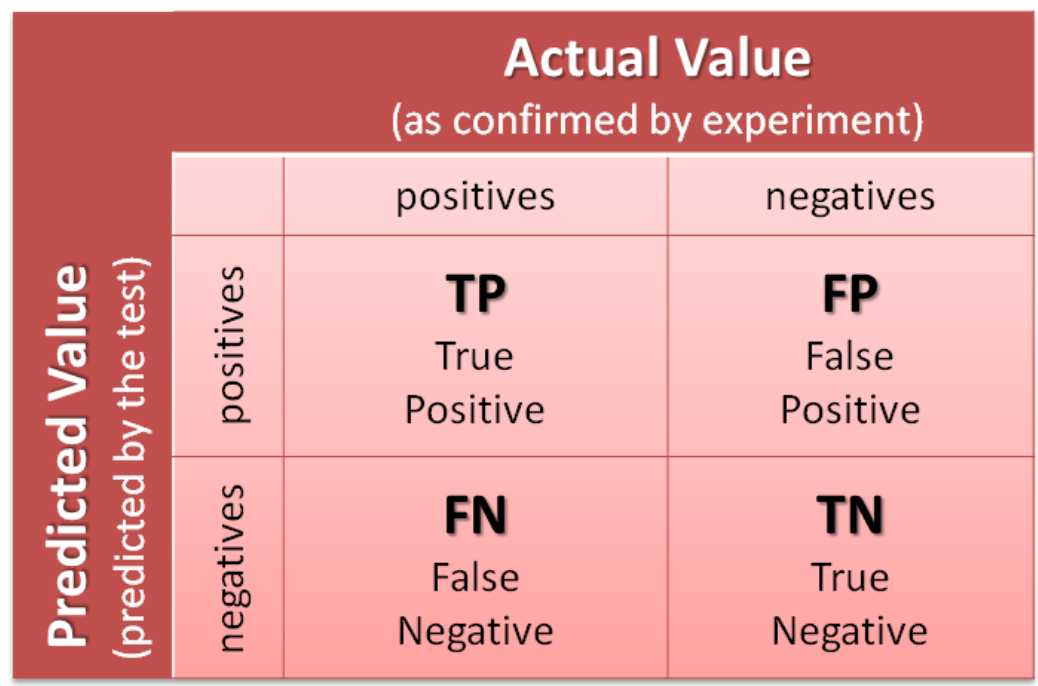

Here, columns represent the count of actual classifications in the test data while rows represent the count of predicted classifications made by the model.

Let’s take an example of a classification problem where we are predicting whether a person is having diabetes or not. Let’s give a label to our target variable:

1: A person is having diabetes | 0: A person is not having diabetes

Four possible outcomes could occur while performing classification predictions:

* True Positives (TP): Number of outcomes that are actually positive and are predicted positive.

For example: In this case, a person is actually having diabetes(1) and the model predicted that the person has diabetes(1).

* True Negatives (TN): Number of outcomes that are actually negative and are predicted negative.

For example: In this case, a person actually doesn’t have diabetes(0) and the model predicted that the person doesn’t have diabetes(0).

* False Positives (FP): Number of outcomes that are actually negative but predicted positive. These errors are also called Type 1 Errors.

For example: In this case, a person actually doesn’t have diabetes(0) but the model predicted that the person has diabetes(1).

* False Negatives (FN): Number of outcomes that are actually positive but predicted negative. These errors are also called Type 2 Errors.

For example: In this case, a person actually has diabetes(1) but the model predicted that the person doesn’t have diabetes(0).

Positive and Negatives refers to the prediction itself. True and False refers to the correctness of the prediction.

Here, we have a scikit-learn implementation of the Confusion matrix:

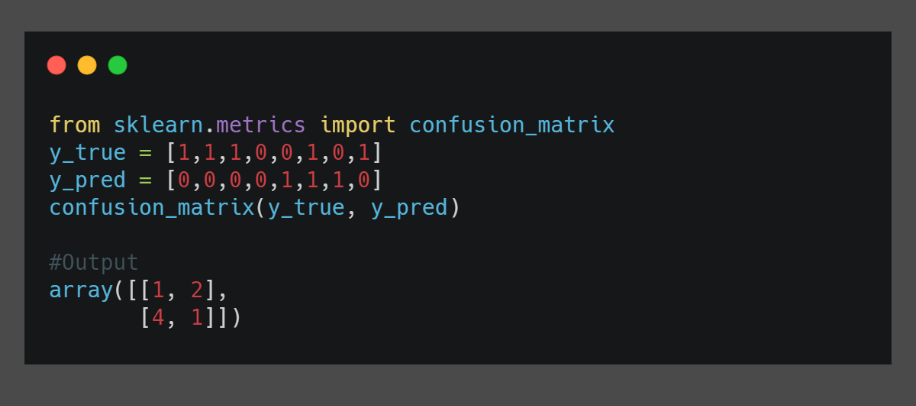

From Scikit-learn official doc:

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

We can get 4 classification metrics from the Confusion Matrix:

### 1.) Accuracy:
It can also be calculated in terms of positives and negatives for binary classification:

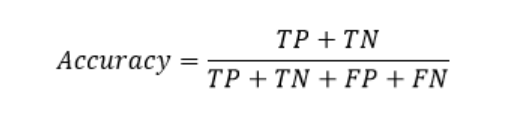

It doesn’t grant us much information regarding the distribution of false positives and false negatives.

Here’s a scikit-learn implementation of accuracy score:

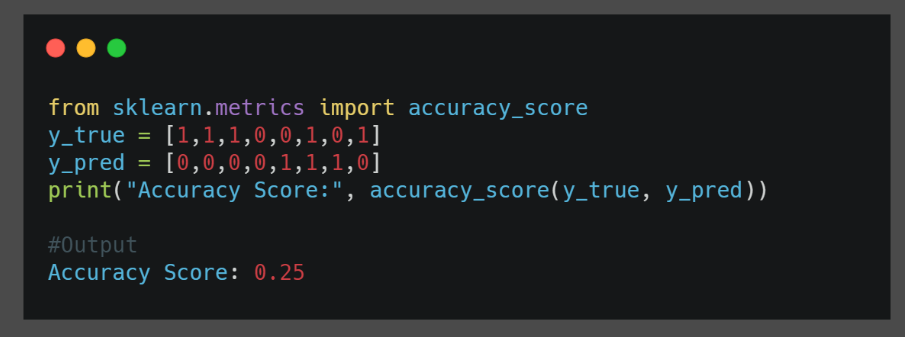

### 2.) Precision or Positive Predictive Value (PPV):
It is the ratio of True Positives to all the positives predicted by the model. It is useful for the skewed and unbalanced dataset. The more False positives the model predicts, the lower the precision.



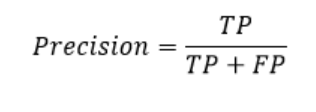

For example, we have a medical test of 20 patients and the test identifies 8 of them have the disease. Of the 8 identified by the test, 5 actually had the disease (true positives) while the other 3 did not (false positives). We later find out that the test missed the 4 additional patients who turned out to have the disease (false negatives).

The values are TP=5, FP=3, FN=4, TN=8.

Precision = 5/5+3 = 0.625

Here’s a scikit-learn implementation of Precision:

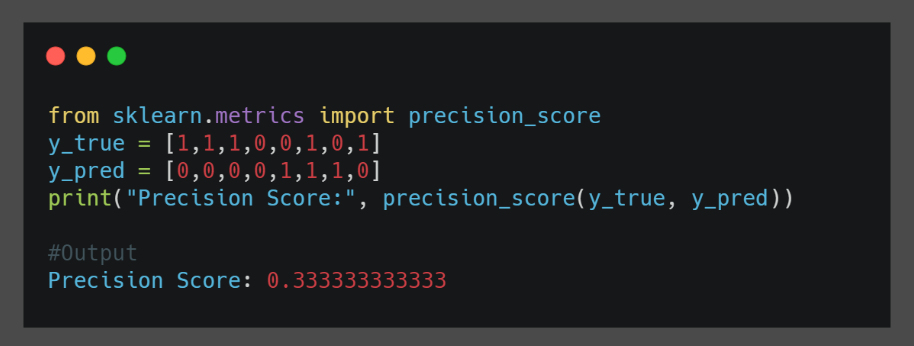

## 3.) Recall or Sensitivity or True Positive Rate(TPR):
It is the ratio of true positives to all the positives in your dataset. It measures the model’s ability to detect positive samples. The more false negatives the model predicts, the lower the recall.

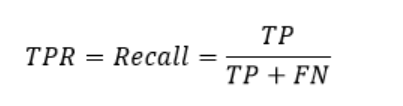


From the previous example of precision, the values are TP=5, FP=3, FN=4, TN=8.

Recall = 5/5+4 = 0.56

Here’s a scikit-learn implementation of Recall:

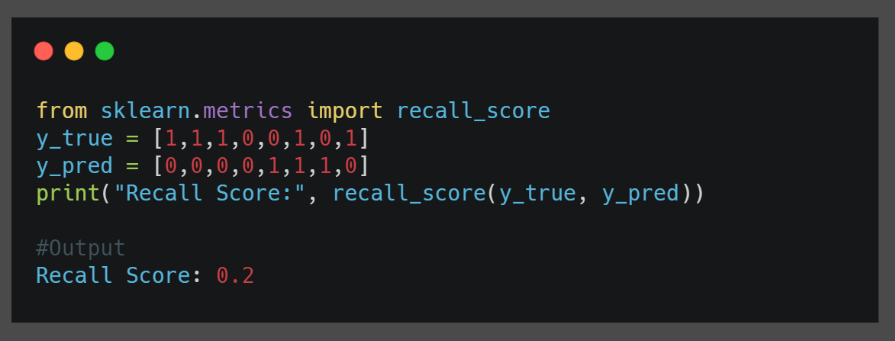

* The precision takes into account how both the positive and negative samples were classified, but the recall only considers the positive samples in its calculations. In other words, the precision is dependent on both the negative and positive samples, but the recall is dependent only on the positive samples (and independent of the negative samples).

* The precision considers when a sample is classified as Positive, but it does not care about correctly classifying all positive samples. The recall cares about correctly classifying all positive samples, but it does not care if a negative sample is classified as positive.

## 4.) F1-score or F-measure:
It is a single metric that combines both Precision and Recall. The higher the F1 score, the better is the performance of our model. The range for F1-score is [0,1].

F1 score is the weighted average of precision and recall. The classifier will only get a high F-score if both precision and recall are high. This metric only favors classifiers that have similar precision and recall.



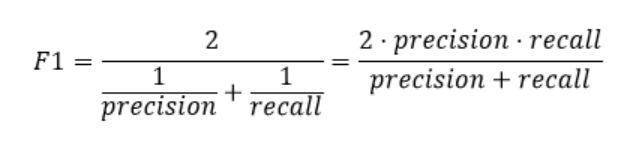

Here’s a scikit-learn implementation of the F1-score:



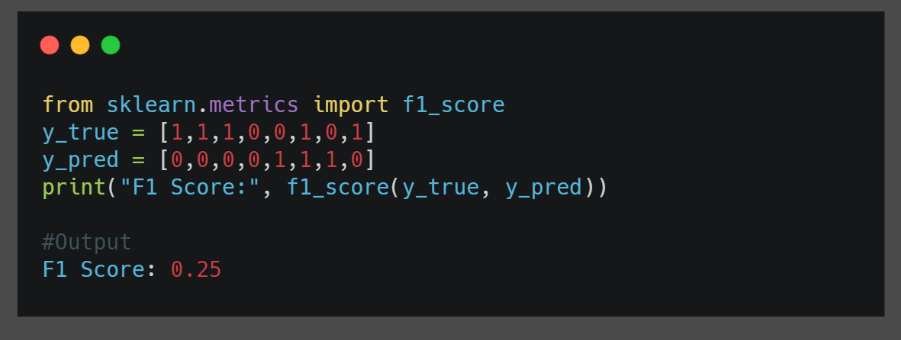

# ROC Curve:
A ROC curve (Receiver Operating Characteristic curve) is a graph showing the performance of a classification model. It is a way to visualize the tradeoff between the True Positive Rate (TPR) and False Positive Rate(FPR) using different decision thresholds (the threshold for deciding whether a prediction is labeled “true” or “false”) for our predictive model.

This threshold is used to control the tradeoff between TPR and FPR. Increasing the threshold will generally increase the precision, but a decrease in recall.

First, let’s see TPR and FPR:-

True Positive Rate (TPR / Sensitivity / Recall): True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, for all positive data points.

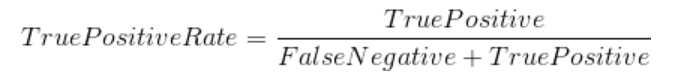

False Positive Rate (FPR): False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, for all negative data points.

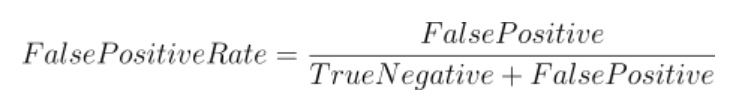

They both have values in the range of [0,1] which are computed at varying threshold values.

The perfect classifier will have high value of true positive rate and low value of false positive rate.

Below is the ROC curve represents a more precise model:

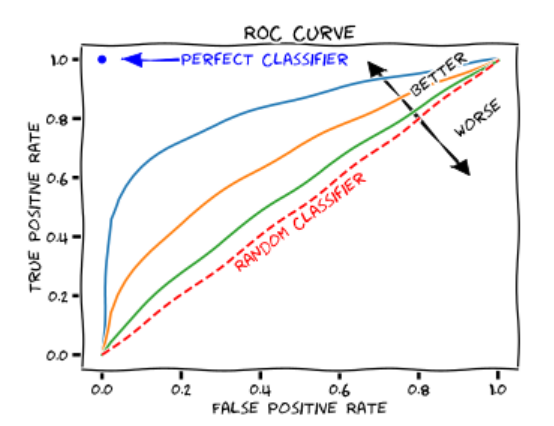

* Any model with a ROC curve above the random guessing classifier line can be considered as a better model.

* Any model with a ROC curve below the random guessing classifier line can outrightly be rejected.

This curve plots TPR and FPR at different classification thresholds but this is inefficient because we have to evaluate our model at various thresholds. There’s an efficient, sorting-based algorithm that can provide us this information which is AUC.

Here’s a scikit-learn implementation of the ROC Curve:

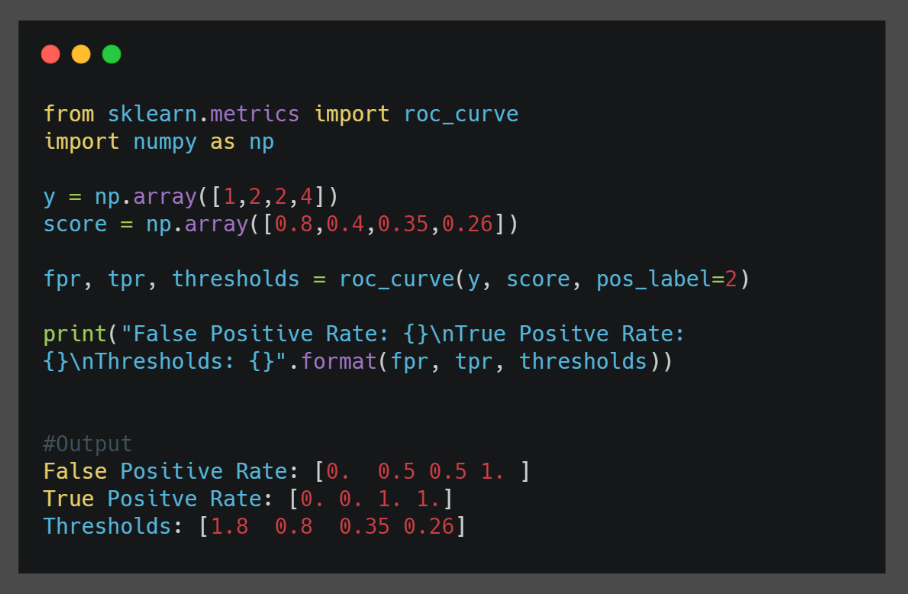

## AUC:
An AUC (Area Under the Curve) or Area Under the ROC Curve, thus the term is short for roc_auc.

AUC is a metric used to summarize a graph by using a single number. It is used for binary classification problems.

Note: AUC is a function that gives points on a curve.

AUC is equal to the probability that the classifier ranks a random positive example more highly than a random negative example.

Here’s a scikit-learn implementation of AUC:

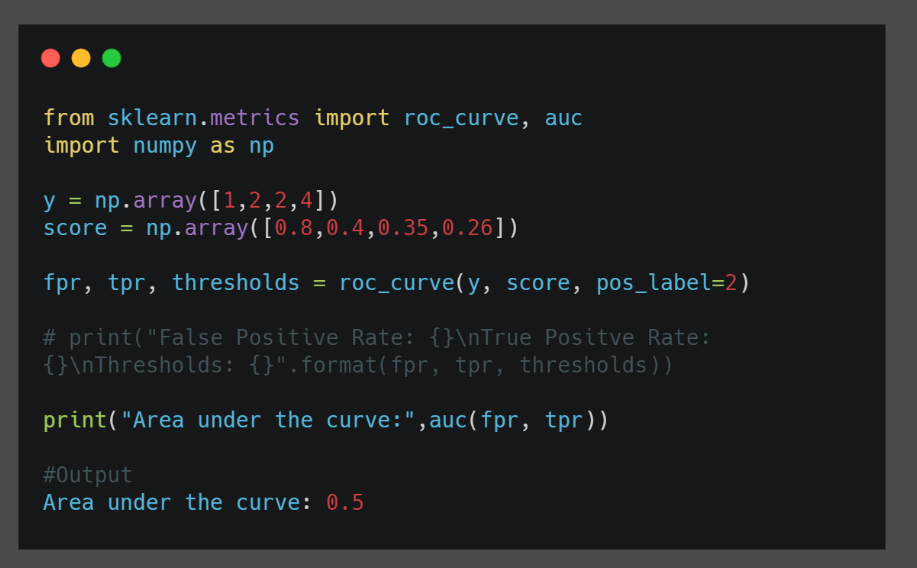

AUC helps compare different models since it summarizes the data from the whole ROC curve. AUC has a range of [0,1]. The greater the value, the better is the performance of our model.


Reference: 
https://neptune.ai/blog/evaluation-metrics-binary-classification